# Cohort Analysis

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Data Analysis/side-project/cohort_analysis/data.csv', encoding='ISO-8859-1')
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 결측치 확인
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

결측치는 비회원 구매인 것으로 예상되며, 우리의 분석 대상은 회원의 재구매율이기 때문에 결측치를 제거 해줍니다.

In [7]:
df = df.dropna() # remove null
df = df[df.Quantity > 0] # remove negative value in Quantity column
df = df[df.UnitPrice > 0] # remove negative value in UnitPrice column
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# 불필요한 컬럼 제거
df = df.drop(['StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country'], axis=1)
df.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,12/1/2010 8:26,17850.0
1,536365,12/1/2010 8:26,17850.0
2,536365,12/1/2010 8:26,17850.0
3,536365,12/1/2010 8:26,17850.0
4,536365,12/1/2010 8:26,17850.0


In [9]:
# 컬럼들의 데이터 타입 변경
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int64') 

## 주문일자 컬럼으로 '연월' 컬럼 만들기

In [10]:
df.shape

(397884, 3)

In [11]:
# 주문일자 컬럼
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [12]:
# 주문일자 컬럼을 활용해 '월단위 주문' 컬럼 생성
df['OrderMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,OrderMonth
0,536365,2010-12-01 08:26:00,17850,2010-12
1,536365,2010-12-01 08:26:00,17850,2010-12
2,536365,2010-12-01 08:26:00,17850,2010-12
3,536365,2010-12-01 08:26:00,17850,2010-12
4,536365,2010-12-01 08:26:00,17850,2010-12


## 고객의 첫번째 주문 확인

In [13]:
# 고객ID를 기준으로 인덱싱
df = df.set_index('CustomerID')
df

,InvoiceNo,InvoiceDate,OrderMonth
CustomerID,,,
17850,536365,2010-12-01 08:26:00,2010-12
17850,536365,2010-12-01 08:26:00,2010-12
17850,536365,2010-12-01 08:26:00,2010-12
17850,536365,2010-12-01 08:26:00,2010-12
17850,536365,2010-12-01 08:26:00,2010-12
...,...,...,...
12680,581587,2011-12-09 12:50:00,2011-12
12680,581587,2011-12-09 12:50:00,2011-12
12680,581587,2011-12-09 12:50:00,2011-12


In [14]:
# 최초 구매일자 계산
FirstOrder = df.groupby([df.index])['InvoiceDate'].min()  # 고객ID별 최초 구매일자를 찾아서 변수에 담아주기
FirstOrder

CustomerID
12346   2011-01-18 10:01:00
12347   2010-12-07 14:57:00
12348   2010-12-16 19:09:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-08-05 13:35:00
18283   2011-01-06 14:14:00
18287   2011-05-22 10:39:00
Name: InvoiceDate, Length: 4338, dtype: datetime64[ns]

In [15]:
FirstOrder = FirstOrder.dt.strftime('%Y-%m')  # 최초 구매일자를 '연-월' 단위로 변경(2010-12-01 05:00:45 → 2010-12)
FirstOrder.head()

CustomerID
12346    2011-01
12347    2010-12
12348    2010-12
12349    2011-11
12350    2011-02
Name: InvoiceDate, dtype: object

In [16]:
df['FirstOrder'] = FirstOrder
df = df.reset_index()
df.head()

,CustomerID,InvoiceNo,InvoiceDate,OrderMonth,FirstOrder
0,17850,536365,2010-12-01 08:26:00,2010-12,2010-12
1,17850,536365,2010-12-01 08:26:00,2010-12,2010-12
2,17850,536365,2010-12-01 08:26:00,2010-12,2010-12
3,17850,536365,2010-12-01 08:26:00,2010-12,2010-12
4,17850,536365,2010-12-01 08:26:00,2010-12,2010-12


## 코호트 그룹으로 주문건수 집계

In [17]:
# 최초 구매시점, 구매시점 기준 그룹핑
grouped = df.groupby(['FirstOrder','OrderMonth'])

In [18]:
# 최초 구매시점별에 따라 구매건수가 어떻게 변화하였는지 집계
cohorts = grouped['CustomerID'].nunique()
cohorts

FirstOrder  OrderMonth
2010-12     2010-12       885
            2011-01       324
            2011-02       286
            2011-03       340
            2011-04       321
                         ... 
2011-10     2011-11        86
            2011-12        41
2011-11     2011-11       323
            2011-12        36
2011-12     2011-12        41
Name: CustomerID, Length: 91, dtype: int64

In [19]:
cohorts = cohorts.reset_index()
cohorts = cohorts.rename({'CustomerID':'TotalOrder'}, axis=1)  # 컬럼명 변경
cohorts.head()

,FirstOrder,OrderMonth,TotalOrder
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321


In [20]:
each_period = cohorts['FirstOrder'].value_counts().sort_index()
each_period

2010-12    13
2011-01    12
2011-02    11
2011-03    10
2011-04     9
2011-05     8
2011-06     7
2011-07     6
2011-08     5
2011-09     4
2011-10     3
2011-11     2
2011-12     1
Name: FirstOrder, dtype: int64

## 기간별 레이블 붙이기

In [21]:
cohortperiod=[]

for x in each_period:
    for y in range(x):
        cohortperiod.append(y)

In [22]:
cohorts['CohortPeriod'] = cohortperiod
cohorts.head()

,FirstOrder,OrderMonth,TotalOrder,CohortPeriod
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4


In [27]:
cohorts = cohorts.pivot_table(index='FirstOrder', columns='CohortPeriod', values='TotalOrder')

KeyError: ignored

In [24]:
cohorts_count

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrder,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
user_retension = cohorts.divide(cohorts[0], axis=0)
user_retension

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrder,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


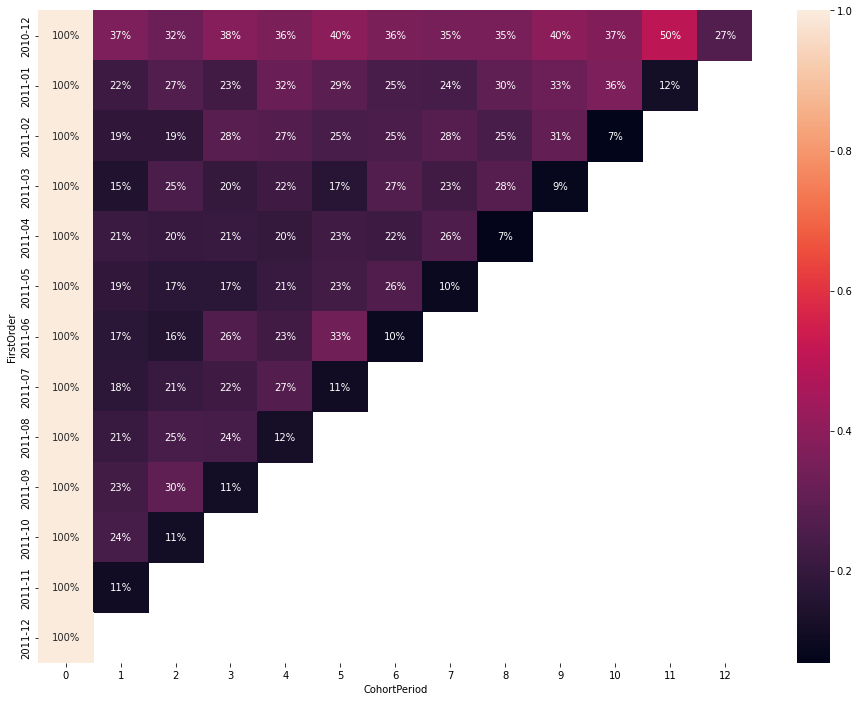

In [26]:
plt.figure(figsize=(16,12))
sns.heatmap(data=user_retension, annot=True, fmt='.0%')
plt.show()